<a href="https://colab.research.google.com/github/TarasMysiura/GoIT_python_17.07.2023/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from utils import *

%matplotlib inline

In [ ]:
X_train,y_train=load_data("ex2data1.txt")

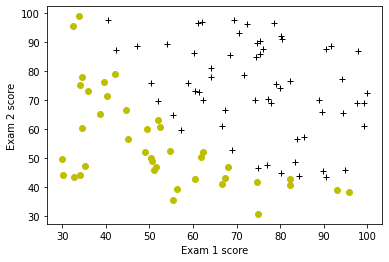

In [ ]:
plot_data(X_train,y_train[:],pos_label="Admitted",neg_label="Not admitted")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

In [ ]:
def sigmoid(z):
  g=1/(1+np.exp(-z))
  return g

In [ ]:
def compute_cost(X,y,w,b,lambda_=1):
  m,n=X.shape

  cost=0
  for i in range(m):
    z=np.dot(X[i],w)+b
    f_wb=sigmoid(z)
    cost+=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
  total_cost=cost/m

  return total_cost

In [ ]:
def compute_gradient(X,y,w,b,lambda_=1):
  m,n=X.shape
  dj_dw=np.zeros(w.shape)
  dj_db=0.

  for i in range(m):
    f_wb_i=sigmoid(np.dot(X[i],w)+b)
    err_i=f_wb_i-y[i]
    for j in range(n):
      dj_dw[j]=dj_dw[j]+err_i*X[i,j]
    dj_db=dj_db+err_i
  dj_dw/=m
  dj_db/=m

  return dj_db,dj_dw

In [ ]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iterations,lambda_):
  m=X.shape[0]
  J_history=[]
  w_history=[]

  for i in range(num_iterations):
    dj_db,dj_dw=gradient_function(X,y,w_in,b_in,lambda_)
    w_in=w_in-alpha*dj_dw
    b_in=b_in-alpha*dj_db
    cost=cost_function(X,y,w_in,b_in,lambda_)
    J_history.append(cost)
    w_history.append(w_in)
    if i%10==0:
      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
  return w_in,b_in,J_history,w_history

In [ ]:
np.random.seed(1)
initial_w=0.01*(np.random.rand(2).reshape(-1,1)-0.5)
initial_b=-8

iterations=10000
alpha=0.001

w,b,J_history,w_history=gradient_descent(X_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations,0)

Iteration    0: Cost     0.96 
Iteration   10: Cost     0.31 
Iteration   20: Cost     0.31 
Iteration   30: Cost     0.31 
Iteration   40: Cost     0.31 
Iteration   50: Cost     0.31 
Iteration   60: Cost     0.31 
Iteration   70: Cost     0.31 
Iteration   80: Cost     0.31 
Iteration   90: Cost     0.31 
Iteration  100: Cost     0.31 
Iteration  110: Cost     0.31 
Iteration  120: Cost     0.31 
Iteration  130: Cost     0.31 
Iteration  140: Cost     0.31 
Iteration  150: Cost     0.31 
Iteration  160: Cost     0.31 
Iteration  170: Cost     0.31 
Iteration  180: Cost     0.31 
Iteration  190: Cost     0.31 
Iteration  200: Cost     0.31 
Iteration  210: Cost     0.31 
Iteration  220: Cost     0.31 
Iteration  230: Cost     0.31 
Iteration  240: Cost     0.31 
Iteration  250: Cost     0.31 
Iteration  260: Cost     0.31 
Iteration  270: Cost     0.31 
Iteration  280: Cost     0.31 
Iteration  290: Cost     0.31 
Iteration  300: Cost     0.31 
Iteration  310: Cost     0.31 
Iteratio

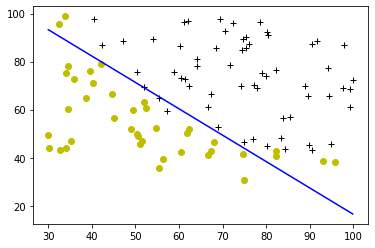

In [ ]:
plot_decision_boundary(w,b,X_train,y_train)

In [ ]:
def predict(X,w,b):
  m,n=X.shape
  p=np.zeros(m)
  for i in range(m):
    z_wb=np.dot(X[i],w)
    z_wb+=b
    f_wb=sigmoid(z_wb)
    p[i]=1 if f_wb>0.5 else 0

  return p


In [ ]:
p=predict(X_train,w,b)
print('Train accuracy: %f'%(np.mean(p==y_train)*100))

Train accuracy: 92.000000


In [ ]:
X_train,y_train=load_data("ex2data2.txt")

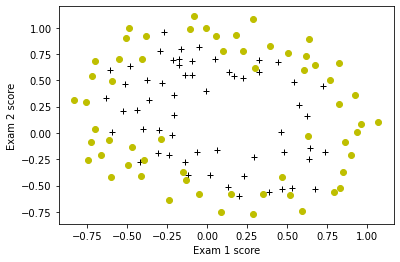

In [ ]:
plot_data(X_train,y_train[:],pos_label="Admitted",neg_label="Not admitted")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

In [ ]:
X_mapped=map_feature(X_train[:,0],X_train[:,1])

In [ ]:
def compute_cost_reg(X,y,w,b,lambda_=1):
  m,n=X.shape
  cost_without_reg=compute_cost(X,y,w,b)
  reg_cost=sum(np.square(w))
  total_cost=cost_without_reg+lambda_/(2*m)*reg_cost

  return total_cost

In [ ]:
def compute_gradient_reg(X,y,w,b,lambda_=1):
  m,n=X.shape
  dj_db,dj_dw=compute_gradient(X,y,w,b)
  for j in range(n):
    dj_dw[j]+=lambda_/m*w[j]

  return dj_db,dj_dw


In [ ]:
np.random.seed(1)
initial_w=0.01*(np.random.rand(X_mapped.shape[1])-0.5)
initial_b=1

lambda_=0.01
iterations=10000
alpha=0.01

w,b,J_history,w_history=gradient_descent(X_mapped,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations,lambda_)

Iteration    0: Cost     0.82 
Iteration   10: Cost     0.81 
Iteration   20: Cost     0.80 
Iteration   30: Cost     0.79 
Iteration   40: Cost     0.78 
Iteration   50: Cost     0.77 
Iteration   60: Cost     0.76 
Iteration   70: Cost     0.76 
Iteration   80: Cost     0.75 
Iteration   90: Cost     0.74 
Iteration  100: Cost     0.73 
Iteration  110: Cost     0.73 
Iteration  120: Cost     0.72 
Iteration  130: Cost     0.72 
Iteration  140: Cost     0.71 
Iteration  150: Cost     0.71 
Iteration  160: Cost     0.70 
Iteration  170: Cost     0.70 
Iteration  180: Cost     0.69 
Iteration  190: Cost     0.69 
Iteration  200: Cost     0.69 
Iteration  210: Cost     0.68 
Iteration  220: Cost     0.68 
Iteration  230: Cost     0.68 
Iteration  240: Cost     0.67 
Iteration  250: Cost     0.67 
Iteration  260: Cost     0.67 
Iteration  270: Cost     0.67 
Iteration  280: Cost     0.66 
Iteration  290: Cost     0.66 
Iteration  300: Cost     0.66 
Iteration  310: Cost     0.66 
Iteratio

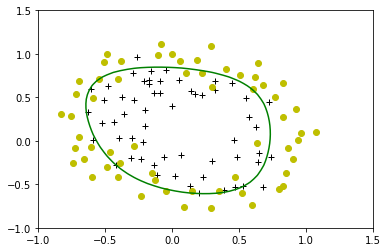

In [ ]:
plot_decision_boundary(w,b,X_mapped,y_train)

In [ ]:
p=predict(X_mapped,w,b)
print('Train accuracy: %f'%(np.mean(p==y_train)*100))

Train accuracy: 83.050847
